<a href="https://colab.research.google.com/github/gauravpks/ml-repo/blob/master/IndustrialSafetyDS/Industrial_Accident_Causal_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Detail
>In this dataset, the information about accidents in 12 manufacturing plants in 3 countries are given by a brazilian company, [IHM Stefanini](https://en.ihm.com.br/). We need to use this dataset to understand why accidents occur, and discover clues to reduce tragedic accidents.<br/>
><p>Dataset columns are below:</p>
><ul>
><li><b>Date</b> : timestamp or time/date information</li>
><li><b>Countries</b> : which country the accident occurred (<b>anonymized</b>)</li>
><li><b>Local</b> : the city where the manufacturing plant is located (<b>anonymized</b>)</li>
><li><b>Industry sector</b> : which sector the plant belongs to</li>
><li><b>Accident level</b> : from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)</li>
><li><b>Potential Accident Level</b> : Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)</li>
><li><b>Genre</b> : if the person is male of female</li>
><li><b>Employee or Third Party</b> : if the injured person is an employee or a third party</li>
><li><b>Critical Risk</b> : some description of the risk involved in the accident</li>
><li><b>Description</b> : Detailed description of how the accident happened</li>
></ul>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading Dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/gauravpks/ml-repo/master/IndustrialSafetyDS/industrial_safety.csv")

In [4]:
df.head(3)

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,01-01-2016 00:00,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,02-01-2016 00:00,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,06-01-2016 00:00,United States,Kentucky,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      424 non-null    object
 1   Countries                 424 non-null    object
 2   Local                     424 non-null    object
 3   Industry Sector           424 non-null    object
 4   Accident Level            424 non-null    object
 5   Potential Accident Level  424 non-null    object
 6   Gender                    424 non-null    object
 7   Employee or Third Party   424 non-null    object
 8   Critical Risk             424 non-null    object
 9   Description               424 non-null    object
dtypes: object(10)
memory usage: 33.2+ KB


In [61]:
df.rename(columns={'Data':'Date', 'Countries':'Country', 'Employee or Third Party':'Employee Type'}, inplace=True)
df.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season
0,2016-01-01,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer
1,2016-02-01,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,1,Monday,5,Summer
2,2016-06-01,United States,Kentucky,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,6,1,Wednesday,22,Winter


#Pre-Processing 

Adding datetime features such as year,month and day

In [64]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x : x.year)
df['Month'] = df['Date'].apply(lambda x : x.month)
df['Day'] = df['Date'].apply(lambda x : x.day)
df['Weekday'] = df['Date'].apply(lambda x : x.day_name())
df['WeekofYear'] = df['Date'].apply(lambda x : x.weekofyear)
df.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season
0,2016-01-01,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer
1,2016-02-01,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,1,Monday,5,Summer
2,2016-06-01,United States,Kentucky,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,6,1,Wednesday,22,Winter


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      424 non-null    datetime64[ns]
 1   Country                   424 non-null    object        
 2   Local                     424 non-null    object        
 3   Industry Sector           424 non-null    object        
 4   Accident Level            424 non-null    object        
 5   Potential Accident Level  424 non-null    object        
 6   Gender                    424 non-null    object        
 7   Employee Type             424 non-null    object        
 8   Critical Risk             424 non-null    object        
 9   Description               424 non-null    object        
 10  Year                      424 non-null    int64         
 11  Month                     424 non-null    int64         
 12  Day                   

Accordin to this discussion, countries are from North America. 
As per knowledge there are four climatological seasons as below.
Spring : September to November
Summer : December to February
Autumn : March to May
Winter : June to August
We can create seasonal variable based on month variable.

In [9]:
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

In [65]:
df['Season'] = df['Month'].apply(month2seasons)
df.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season
0,2016-01-01,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer
1,2016-02-01,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,1,Monday,5,Summer
2,2016-06-01,United States,Kentucky,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,6,1,Wednesday,22,Winter


#Exploratory Data Analysis



---
Univariate Analysis


---





**Accident by Country**

In [67]:
df['Country'].value_counts()

United States     251
Canada            129
Mexico             44
Name: Country, dtype: int64

In [71]:
country_cnt =np.round((df['Country'].value_counts(normalize=True)* 100 ))
country_cnt

United States     59.0
Canada            30.0
Mexico            10.0
Name: Country, dtype: float64

In [58]:
type(country_cnt)

pandas.core.series.Series

In [80]:
percent = country_cnt.to_numpy()
country = country_cnt.keys().values


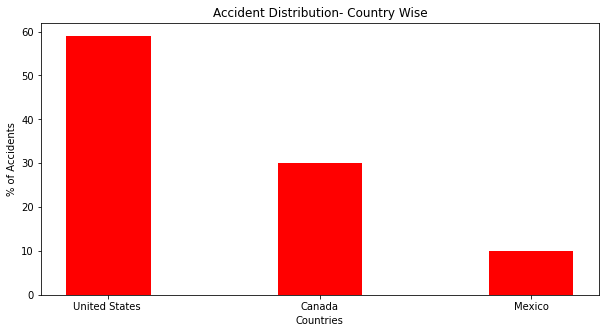

In [83]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(country, percent, color ='red',  
        width = 0.4) 
plt.xlabel("Countries") 
plt.ylabel("% of Accidents") 
plt.title("Accident Distribution- Country Wise") 
plt.show()

**Accident By Local**

In [16]:
local_cnt = np.round(df['Local'].value_counts(normalize=True) * 100)
local_cnt

Kentucky             21.0
British Columbia     14.0
West Virginia        13.0
Illinois             13.0
Pennsylvania         11.0
Mexico City          10.0
Ontario               6.0
Alberta               6.0
Manitoba              4.0
Quebec                1.0
Yukon                 1.0
Montana               0.0
Name: Local, dtype: float64

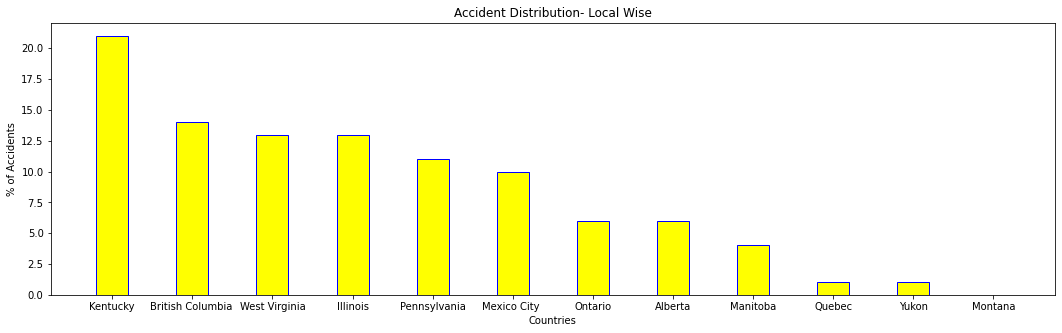

In [91]:
fig = plt.figure(figsize = (18, 5)) 
plt.bar(local_cnt.keys().values, local_cnt.to_numpy(), color ='yellow', width = 0.4, edgecolor='blue') 
plt.xlabel("Countries") 
plt.ylabel("% of Accidents") 
plt.title("Accident Distribution- Local Wise") 
plt.show()

**Accident By Sector**

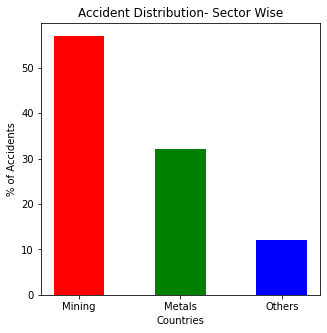

In [94]:
sector_cnt = np.round(df['Industry Sector'].value_counts(normalize=True) * 100)
fig = plt.figure(figsize = (5, 5)) 
plt.bar(sector_cnt.keys().values, sector_cnt.to_numpy(), color=['red', 'green', 'blue'], width = 0.5) 
plt.xlabel("Countries") 
plt.ylabel("% of Accidents") 
plt.title("Accident Distribution- Sector Wise") 
plt.show()

**By Accident Level**

In [95]:
ac_level_cnt = np.round(df['Accident Level'].value_counts(normalize=True) * 100)
pot_ac_level_cnt = np.round(df['Potential Accident Level'].value_counts(normalize=True) * 100, decimals=1)

In [125]:
ac_level_cnt

I      74.0
II      9.0
III     7.0
IV      7.0
V       2.0
Name: Accident Level, dtype: float64

In [126]:
pot_ac_level_cnt

IV     33.7
III    25.0
II     22.2
I      11.6
V       7.3
VI      0.2
Name: Potential Accident Level, dtype: float64

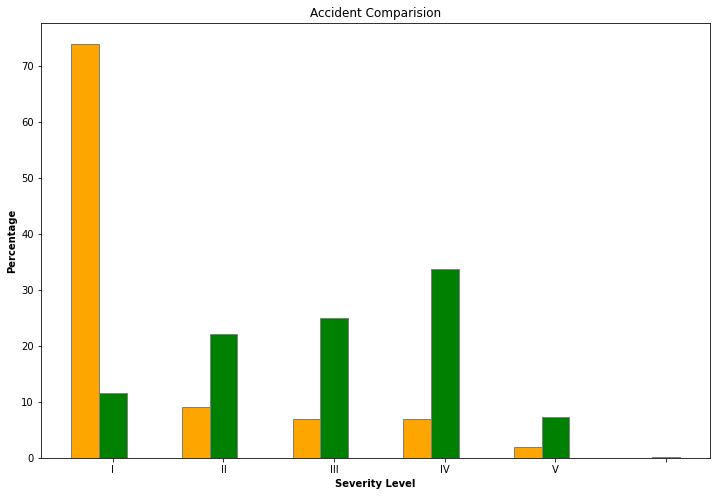

In [133]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
idx = [3, 2, 1, 0, 4, 5]   
# set height of bar 
ac_cnt = np.append(ac_level_cnt.to_numpy(), 0)
pot_cnt = pot_ac_level_cnt.to_numpy()[idx]

# Set position of bar on X axis 
br1 = np.arange(len(ac_cnt)) 
br2 = [x + barWidth for x in br1] 

   
# Make the plot 
plt.bar(br1, ac_cnt, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='IT') 
plt.bar(br2, pot_cnt, color ='g', width = barWidth, 
        edgecolor ='grey', label ='ECE') 

   
# Adding Xticks  
plt.xlabel('Severity Level', fontweight ='bold') 
plt.ylabel('Percentage', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(IT))], 
           ac_level_cnt.keys().values) 
plt.title("Accident Comparision")   
plt.show() 

**Gender Wise**

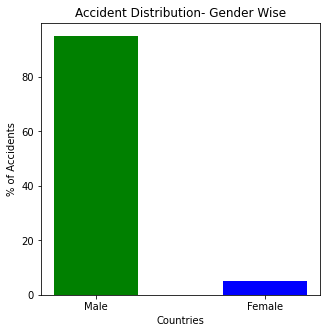

In [135]:
gender_cnt = np.round(df['Gender'].value_counts(normalize=True) * 100)
fig = plt.figure(figsize = (5, 5)) 
plt.bar(gender_cnt.keys().values, gender_cnt.to_numpy(), color=[ 'green', 'blue'], width = 0.5) 
plt.xlabel("Countries") 
plt.ylabel("% of Accidents") 
plt.title("Accident Distribution- Gender Wise") 
plt.show()

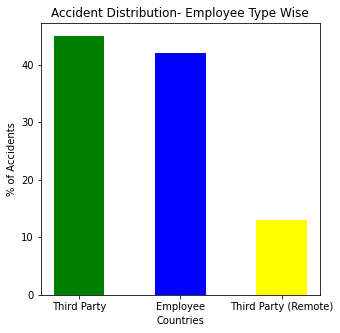

In [140]:
emp_type_cnt = np.round(df['Employee Type'].value_counts(normalize=True) * 100)
fig = plt.figure(figsize = (5, 5)) 
plt.bar(emp_type_cnt.keys().values, emp_type_cnt.to_numpy(), color=[ 'green', 'blue', 'yellow'], width = 0.5) 
plt.xlabel("Countries") 
plt.ylabel("% of Accidents") 
plt.title("Accident Distribution- Employee Type Wise") 
plt.show()

In [146]:
cr_risk_cnt = np.round(df['Critical Risk'].value_counts(normalize=True) * 100, decimals=2)

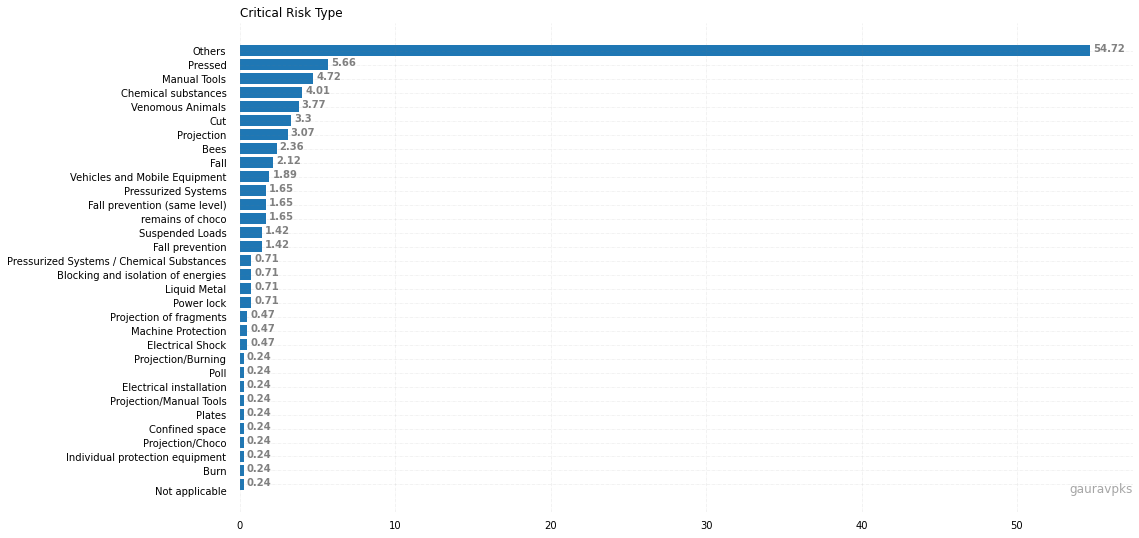

In [148]:
# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 

# Horizontal Bar Plot 
ax.barh( cr_risk_cnt.keys().values, cr_risk_cnt.to_numpy()) 

# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
	ax.spines[s].set_visible(False) 

# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
		linestyle ='-.', linewidth = 0.5, 
		alpha = 0.2) 

# Show top values 
ax.invert_yaxis() 

# Add annotation to bars 
for i in ax.patches: 
	plt.text(i.get_width()+0.2, i.get_y()+0.5, 
			str(round((i.get_width()), 2)), 
			fontsize = 10, fontweight ='bold', 
			color ='grey') 

# Add Plot Title 
ax.set_title('Critical Risk Type', 
			loc ='left', ) 

# Add Text watermark 
fig.text(0.9, 0.15, 'gauravpks', fontsize = 12, 
		color ='grey', ha ='right', va ='bottom', 
		alpha = 0.7) 

# Show Plot 
plt.show() 
